# Data preparation - usefull functions
---
All materials presented in that notebooks were created or modified by:   __Pawel Rosikiewicz__ __www.SimpleAI.ch__


Note from Author  
_I am using these functions on daily basis for EDA in my projects, thus I hope you will find mhem uefull. All fubnctions my functions are avaiable in src folder, under MIT Licence_



In [1]:
import os
import sys
import re
import glob
import random
import itertools
import pathlib

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# set basedir
'''This notebook, is in additinal notebooks folder, 
    thus we need to remove the last path part wiht pathlib
'''
path = pathlib.Path(os.getcwd())
basedir = pathlib.Path(*path.parts[:-1])
os.chdir(basedir)

## load, concatenate, shuffle, and divide into new train/test 

In [3]:
# DATA PREPARATION FOR THE PROJECT
''' this code lines are only for demonstration purposes, 
    the train, and test datasets, are part of the same dataset, but the test.csv, donet have 
    target variable - SalePrice. The code can be used to join, shuffle and then divide many datasets
'''

# Load to DataFrame
df_train = pd.read_csv(os.path.join(basedir,'data/train.csv'))
df_test = pd.read_csv(os.path.join(basedir,'data/test.csv'))

# check dimensions
print(f"df.shape train {df_train.shape}")
print(f"df.shape test {df_test.shape}")

# 
validation_data_ratio = 0.2

# concatenate
all_data_df = pd.concat([df_train, df_test], axis=0)
all_data_df.reset_index(drop=True, inplace=True)
print(f"df.shape all data {all_data_df.shape}")

# generate list of indexes
indexes = np.arange(all_data_df.shape[0])

# shuffle
np.random.seed(0)
np.random.shuffle(indexes)

# split indexes
split_idx = int(validation_data_ratio*indexes.shape[0])
validation_idx = indexes[0:split_idx]
train_test_idx = indexes[split_idx::]

# create train/test & validation datasets
data_df = all_data_df.iloc[train_test_idx,:].reset_index(drop=True)
validation_df = all_data_df.iloc[validation_idx,:].reset_index(drop=True)

# test shapes
print(f"df.shape train/test {data_df.shape}")
print(f"df.shape validation {validation_df.shape}")

# safe
os.chdir(os.path.join(basedir, "data"))
#.  data_df.to_csv("HousePrices_Ames_train.csv", index=False)  
#.  validation_df.to_csv("HousePrices_Ames_validation.csv", index=False)

data_df.head()

df.shape train (1460, 81)
df.shape test (1459, 80)
df.shape all data (2919, 81)
df.shape train/test (2336, 81)
df.shape validation (583, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  2454          80       RM         76.0    11800   Pave   NaN      Reg   
1  1174          50       RL        138.0    18030   Pave   NaN      IR1   
2   899          20       RL        100.0    12919   Pave   NaN      IR1   
3  1365         160       FV         30.0     3180   Pave  Pave      Reg   
4   564          50       RL         66.0    21780   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Bnk    AllPub  ...        0    NaN  MnPrv         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      5   2007        WD         Normal        NaN  
1      3   2007        WD         Normal   200500.0  
2      3   2010       New        Partial   611657.0  
3      4   2006        WD        Abnorml   144152.0  
4      7   2008        WD         Normal   185000.0  

[5 rows x 81 columns]

## some basic fucntions from dataframe explorer

In [29]:
from src.utils.DataFrameExplorer_features import show_df_exaples
from src.utils.DataFrameExplorer_features import show_unlisted_variables
from src.utils.DataFrameExplorer_features import nice_boxplot
from src.utils.DataFrameExplorer_cleaning import find_pattern
from src.utils.DataFrameExplorer_summary import df_summary_plot

In [25]:
## check which column names are different betwen two df's
''' this function, takes dataframe, and list or dictionary with lists of feature names, 
    it returns, the informaiton on how many of these listed features were found among column names in input df (defined variables), 
    how many were not listed but present in df, (undefined variables) and how many were not names found in df (unknownw)
    Comment: i will be working on improving this function, but the syntax will remain the same'''
defined, undefined, unknown =show_unlisted_variables(
    df_train,
    df_test.columns.values.tolist(),
    verbose=True
)

display(undefined) 
# shodul show SalsePrice, that is absent in test_df. wiht examples collected in input df, here train df, 

input df var: 81
provided var names: 80
-----------------------------------
defined var: 80 - (these variable names were found in df) 
undefined var: 1 - (these variable names are in df, and were not specified in input list)
unknownw var: 0 - (these variable names were provided in input list, but were missing in df.columns)



name  dtype  class_nr  instances  na  eg1_value  eg1_counts  \
0  SalePrice  int64       663       1460   0     140000  20; (1.4%)   

   eg2_value  eg2_counts  
0     135000  17; (1.2%)

In [26]:
# get table with summery on selected features
features = ["Neighborhood", "OverallQual"]
show_df_exaples(data_df, features, n=3)

name   dtype  class_nr  instances  na eg1_value    eg1_counts  \
0  Neighborhood  object        25       2336   0     NAmes  363; (15.5%)   
1   OverallQual   int64        10       2336   0         5  678; (29.0%)   

  eg2_value    eg2_counts eg3_value    eg3_counts  
0   CollgCr   210; (9.0%)   OldTown   188; (8.0%)  
1         6  584; (25.0%)         7  467; (20.0%)

In [27]:
# or find and summarize group of features knowling only key word in their names
features = find_pattern(pd.Series(data_df.columns.values), pat="Qual")
show_df_exaples(data_df, features, n=3)

name   dtype  class_nr  instances   na eg1_value     eg1_counts  \
0   OverallQual   int64        10       2336    0         5   678; (29.0%)   
1     ExterQual  object         4       2336    0        TA  1453; (62.2%)   
2      BsmtQual  object         4       2336   65        TA  1041; (44.6%)   
3  LowQualFinSF   int64        31       2336    0         0  2303; (98.6%)   
4   KitchenQual  object         4       2336    0        TA  1204; (51.5%)   
5    GarageQual  object         5       2336  136        TA  2076; (88.9%)   

  eg2_value    eg2_counts eg3_value    eg3_counts  
0         6  584; (25.0%)         7  467; (20.0%)  
1        Gd  769; (32.9%)        Ex    89; (3.8%)  
2        Gd  952; (40.8%)        Ex   211; (9.0%)  
3        80     3; (0.1%)       360     2; (0.1%)  
4        Gd  898; (38.4%)        Ex   175; (7.5%)  
5        Fa   100; (4.3%)        Gd    18; (0.8%)

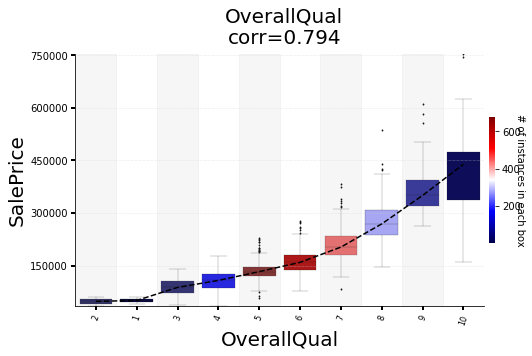

In [28]:
# and you may plot categorical ~numerical variable
nice_boxplot(df=data_df, yvar="SalePrice", xvar="OverallQual", figsize=(8,5))

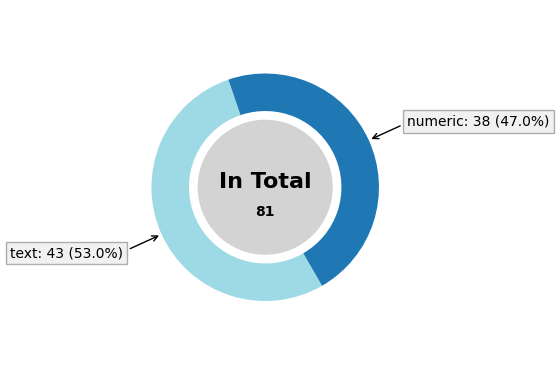

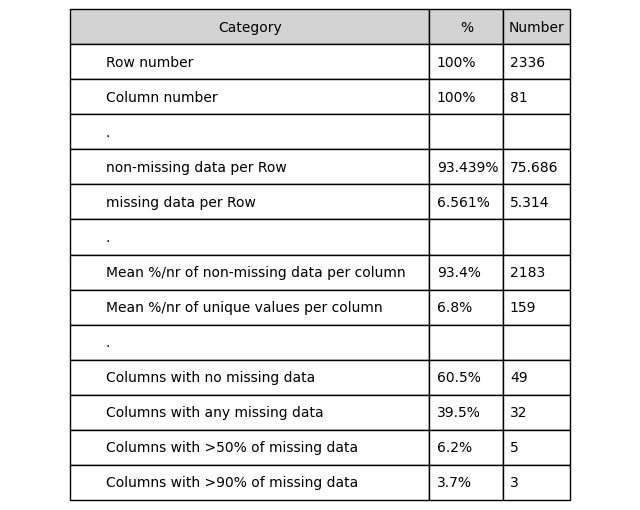

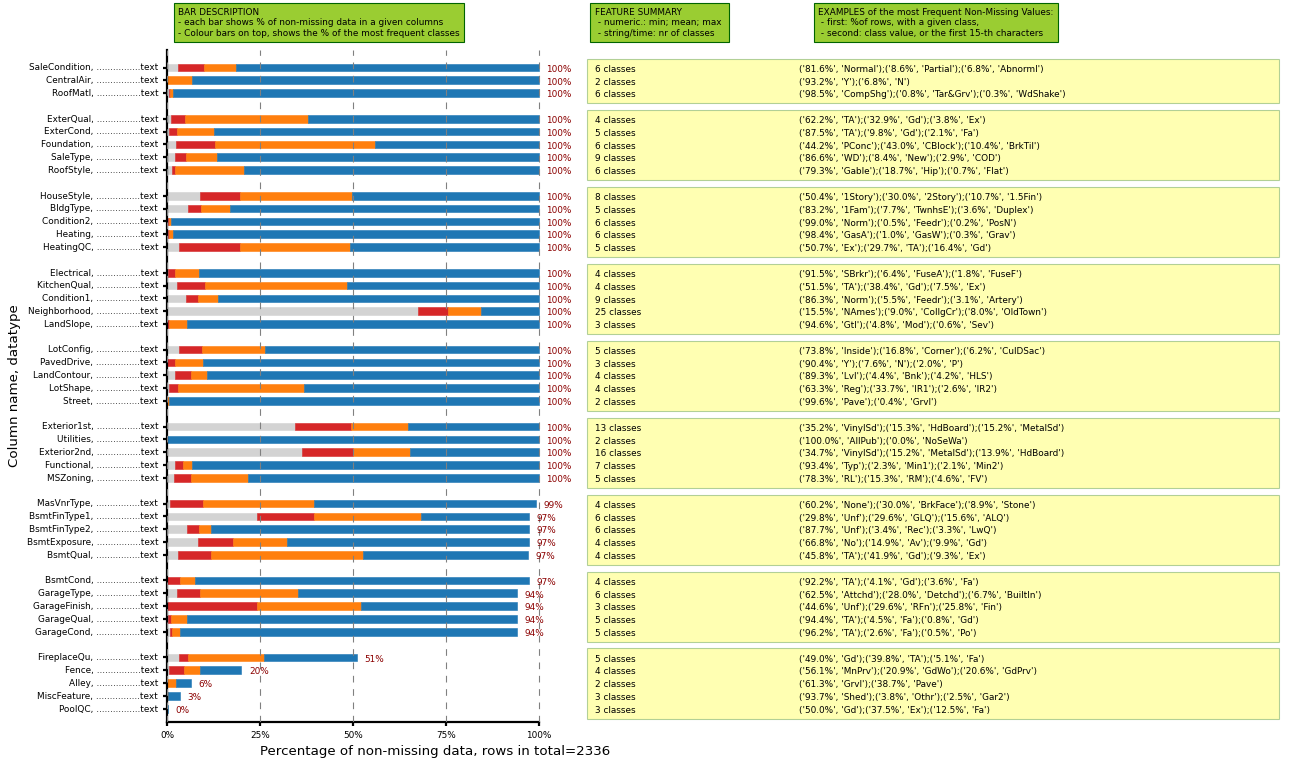

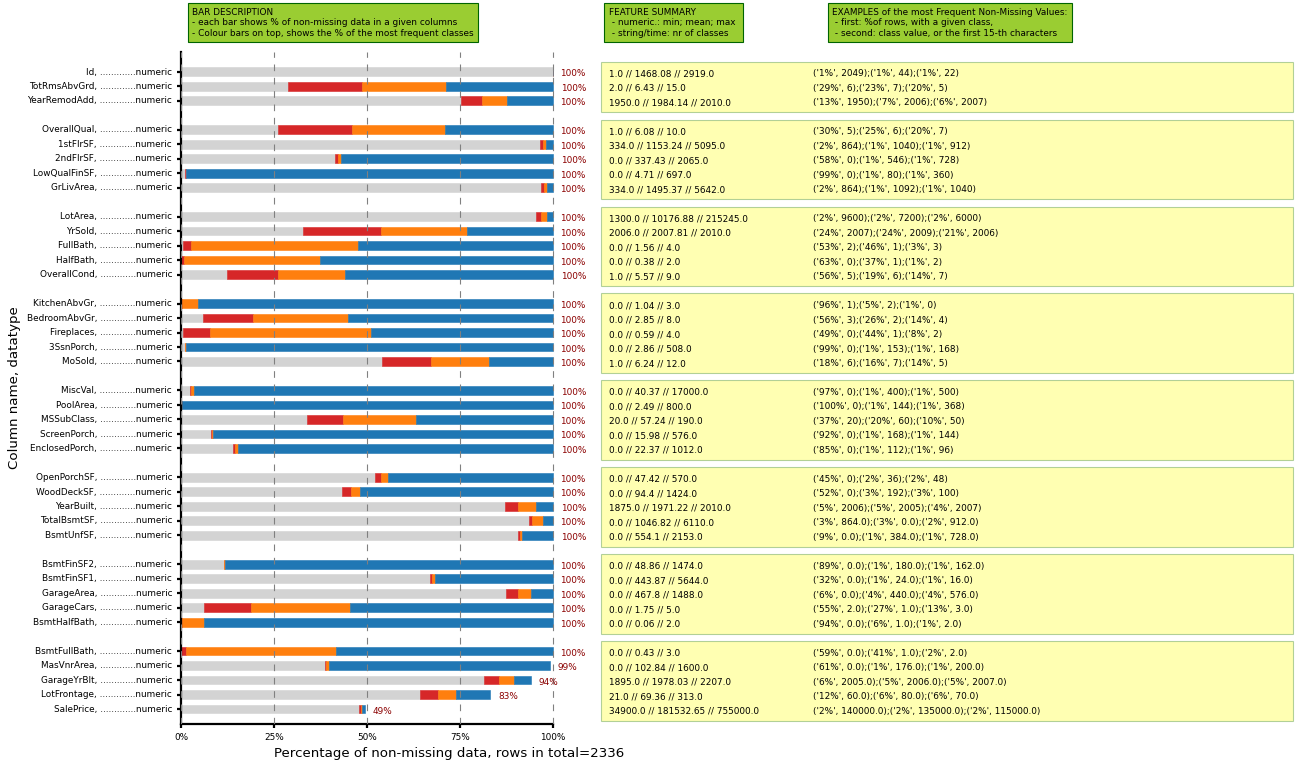

In [33]:
# create general summary for the dataset
""" Tips:
        * use help(dfe.df_summary_plot)
        * double click on figure to enlarge
"""
# plot data frame summary with dfe package
df_summary_plot(
    df                  = data_df,
    barPlot_figsize     = (18,12),
    groups_to_display   = ['text','numeric','datetime'], # to have separate barplot for each dtype
) 

## testing normality



__Normality Check__

* __Visual inspection;__ the goal is to check if the points from two distributions (numerical data from a given attribute, and theoretical values if it these points woufl be normaly distributed), lie on the y~x line. Three types of plots giving similar results are commonly used:
    * __QQ-Plots;__ The “Q” in QQ-plot stands for quantile. The quantiles of a given data set are plotted against the quantiles of a reference distribution, typically the standard normal distribution.
    * __PP-Plots;__  Plot the CDF (cumulative-distribution-function) of a given data set against the CDF of a reference distribution.
    * __Probability Plots;__ Plot the ordered values of a given data set against the quantiles of a reference distribution.
    
   
__Statistical testes for Normality__

* __Why so many tests for normality?__
    * Sometimes only few samples may be available, while other times one may have many data, but some extremely outlying values. To cope with the different situations different tests for normality have been developed. These tests to evaluate normality (or similarity to some specific distribution) can be broadly divided into two categories:
        * 1. __Tests based on comparison (“best fit”) with a given distribution__, often specified in terms of its CDF. Examples are the Kolmogorov–Smirnov test, the Lilliefors test, the Anderson–Darling test, the Cramer–von Mises criterion, as well as the Shapiro–Wilk and Shapiro–Francia tests.
        * 2. __Tests based on descriptive statistics of the sample.__ 
            * skewness test, 
            * the kurtosis test
            * D’Agostino–Pearson omnibus test
            * Jarque–Bera test.    
            
            <br>

* __Which test to use?__
    * __Small sample-numbers (<50)__
        * use the Shapiro-Wilk test or "normaltest"
        * The Shapiro–Wilk W test depends on the covariance matrix between the order statistics of the observations
        * The scipy normaltest is based on D-Agostino and Pearsons test that
    # combines skew and kurtosis to produce an omnibus test of normality
    * __Intermediate sample numbers (50-300)__
        * use Shapiro–Wilk W or Lilliefors-test
        * __Lilliefors-test__ was based on the Kolmogorov–Smirnov test, and it quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution (eg normal distrib), or between the empirical distribution functions of two samples.
        * Lilliefors-test is good because original Kolmogorov-Smirnov-test is unreliable when mean and std of the distribution are not known.
    * __large sample numbers (>300)__
        * the Kolmogorov-Smirnov(Kolmogorov-Smirnov) test should only be used for large sample numbers
        
    * Important:
        * while having sufficient sample size, Kolmogorov-Smirnov and Lilliefors-test, are the least affected with extreme values (outliers), followed with  Shapiro–Wilk test, that is more affected by these values, but less then the omnibus test.
        
        
__Outliers__
* typically, we may define certain points as potential outliers, if more than 1.5*IQR (inter- quartile range), or more than two standard deviations, from the sample mean.
* Causes:
    * mistakes, >>> best to exlude, 
    * rare or extreme values >>> shodul be used 



plot hist with distr and normal distribusion


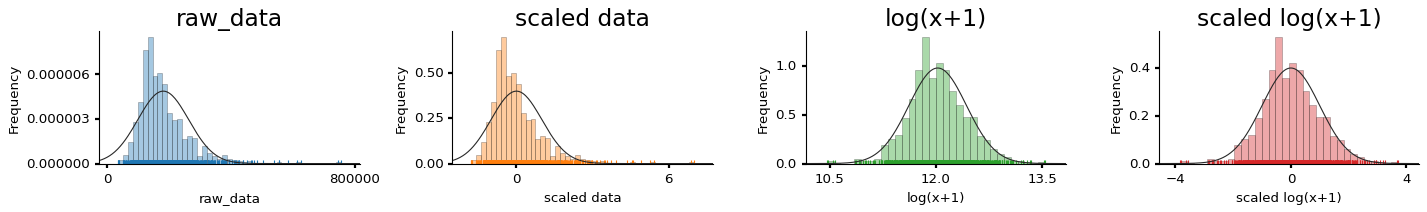

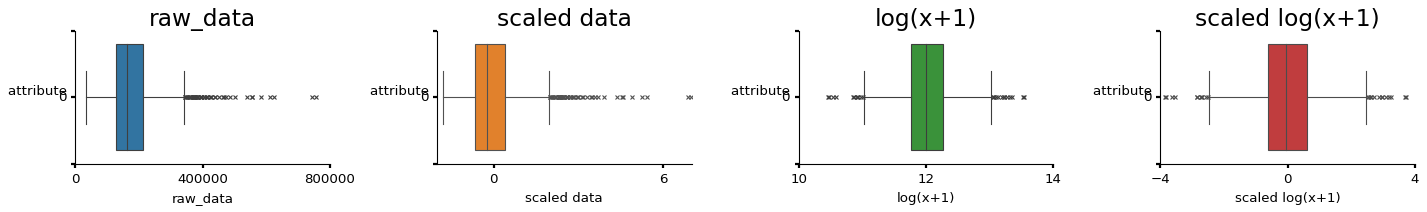

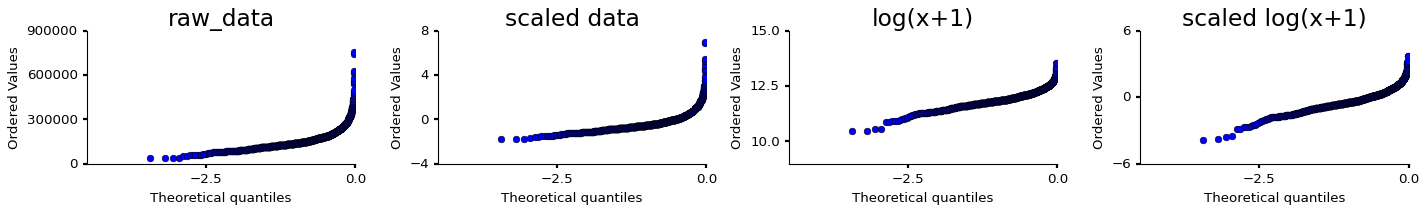

In [48]:
from sklearn.preprocessing import scale
from src.utils.plot_histograms import plot_histograms, multiple_sns_displots, feature_distribution
from src.utils.DataFrameExplorer_distribusion import normality_plots

import warnings
warnings.filterwarnings("ignore") # for depracietad function names,

# create new dataframe with some test transformaitons for the target variable
target_df = pd.DataFrame({
    "raw_data": data_df.loc[:,"SalePrice"],
    "scaled data": scale(data_df.loc[:,"SalePrice"]),
    "log(x+1)": np.log1p(data_df.loc[:,"SalePrice"]),
    "scaled log(x+1)": scale(np.log1p(data_df.loc[:,"SalePrice"]))
})

for plot_type in ["hist", "box", "probplot"]:   
    normality_plots(
        plot_type=plot_type ,
        df=target_df, 
        names= target_df.columns,#target_df.columns.values.tolist(),
        figscale=1.5, #color="forestgreen",
        distplot_dct={
            "norm_hist":True, "rug":True, "kde":False , 
            "fit":stats.norm,"hist_kws":{"linewidth":0.5}}
    )

In [50]:
test_normality = lambda x: stats.shapiro(x.dropna(0))[1] > 0.01
isnormal = target_df.apply(test_normality)
print(isnormal)

raw_data           False
scaled data        False
log(x+1)           False
scaled log(x+1)    False
dtype: bool


### evaluate in detail one attribute

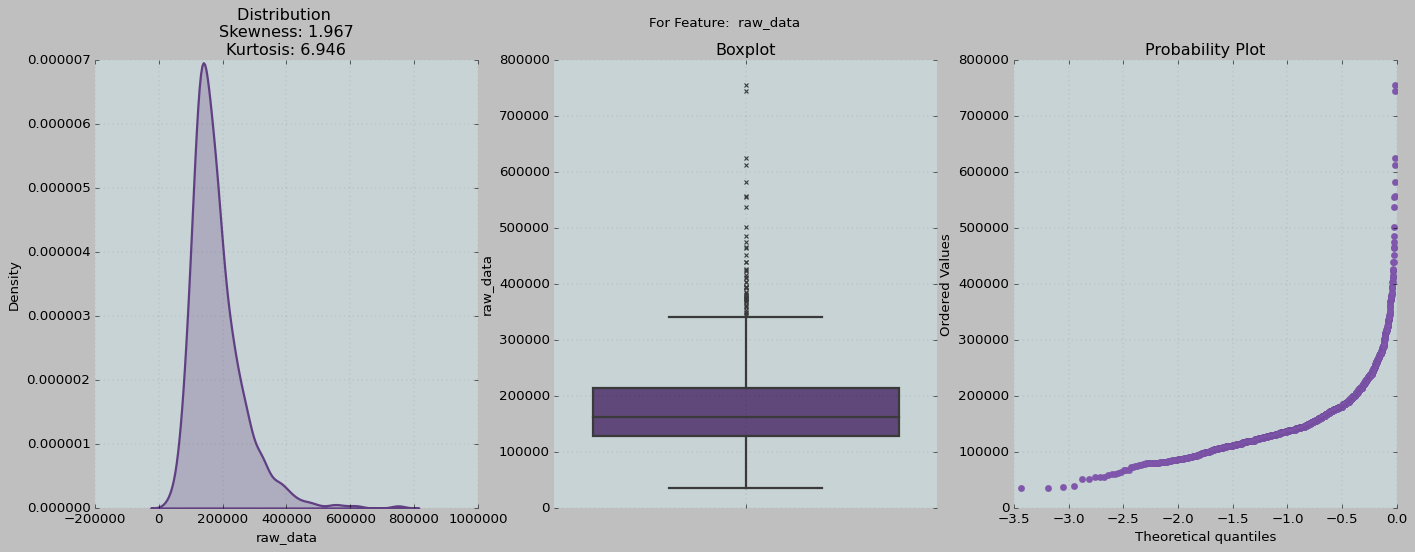

In [46]:
from src.utils.plot_histograms import feature_distribution

feature_distribution(target_df, col="raw_data")

just histograms

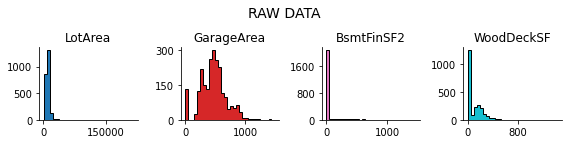

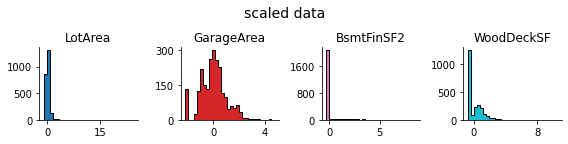

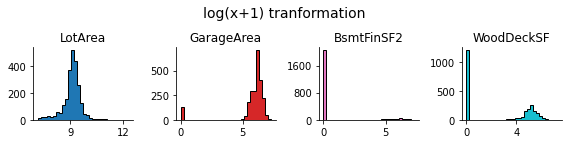

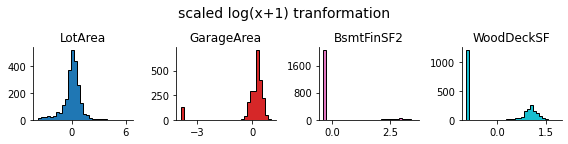

In [12]:

from sklearn.preprocessing import scale
from src.utils.plot_histograms import plot_histograms, multiple_sns_displots, feature_distribution


# subset some of numerical features
s_features = ['LotArea','GarageArea', 'BsmtFinSF2','WoodDeckSF']
s_df = data_df.loc[:,s_features]

# plot hist with raw data , and different types of tranformations
plot_histograms(title="RAW DATA", df=s_df, names=s_features)
plot_histograms(title="scaled data", df=scale(s_df), names=s_features)
plot_histograms(title="log(x+1) tranformation", df=np.log1p(s_df), names=s_features)
plot_histograms(title="scaled log(x+1) tranformation", df=scale(np.log1p(s_df)), names=s_features)

## see the effect fo data transofmraion on the sample points distribusion

In [14]:
Quantitative_variables = [ 
    "1stFlrSF", "2ndFlrSF", "3SsnPorch", "BedroomAbvGr", 
    "BsmtFinSF1", "BsmtFinSF2", "BsmtFullBath", "BsmtHalfBath", "BsmtUnfSF", 
    "EnclosedPorch", "Fireplaces", "FullBath", "GarageArea", "GarageCars", "GarageYrBlt", 
    "GrLivArea", "HalfBath", "KitchenAbvGr", "LotArea", "LotFrontage", "LowQualFinSF", 
    "MSSubClass", "MasVnrArea", "MiscVal", "MoSold", "OpenPorchSF", "OverallCond", "OverallQual", 
    "PoolArea", "ScreenPorch", "TotRmsAbvGrd", "TotalBsmtSF", "WoodDeckSF", "YearBuilt", "YearRemodAdd", "YrSold"]

from src.utils.DataFrameExplorer_features import show_unlisted_variables

# test if you listed all 36 int/float variables correctly
defined, undefined, unknown =show_unlisted_variables(data_df, Quantitative_variables, verbose=True, n=3)
defined.head(3)


input df var: 81
provided var names: 36
-----------------------------------
defined var: 36 - (these variable names were found in df) 
undefined var: 45 - (these variable names are in df, and were not specified in input list)
unknownw var: 0 - (these variable names were provided in input list, but were missing in df.columns)



name  dtype  class_nr  instances  na  eg1_value     eg1_counts  \
0   1stFlrSF  int64       959       2336   0      864.0     41; (1.8%)   
1   2ndFlrSF  int64       563       2336   0        0.0  1336; (57.2%)   
2  3SsnPorch  int64        28       2336   0        0.0  2304; (98.6%)   

   eg2_value  eg2_counts  eg3_value  eg3_counts  
0     1040.0  22; (0.9%)      912.0  17; (0.7%)  
1      546.0  18; (0.8%)      728.0  16; (0.7%)  
2      168.0   3; (0.1%)      153.0   3; (0.1%)

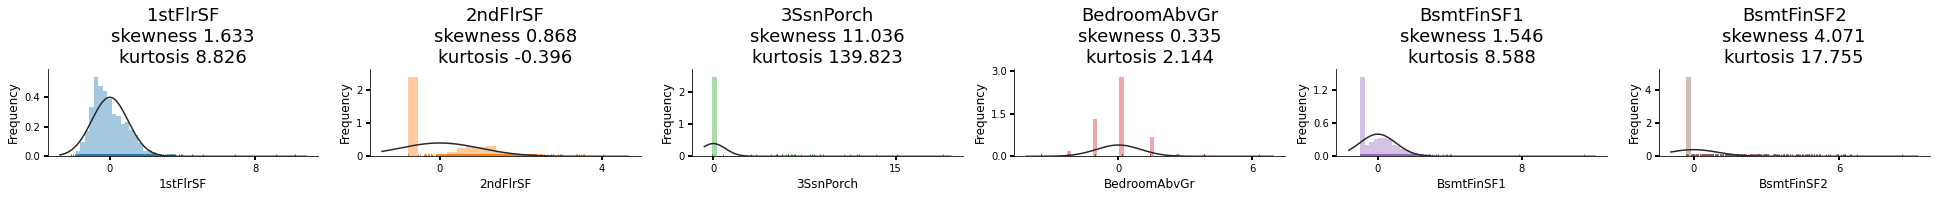

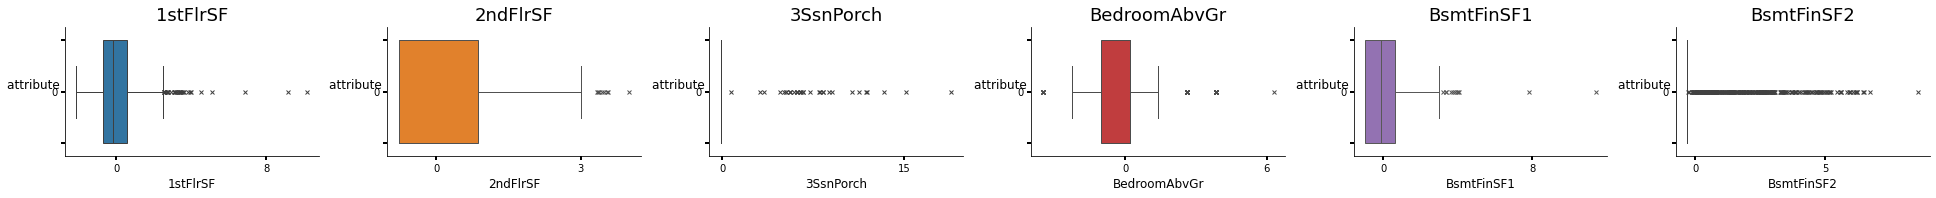

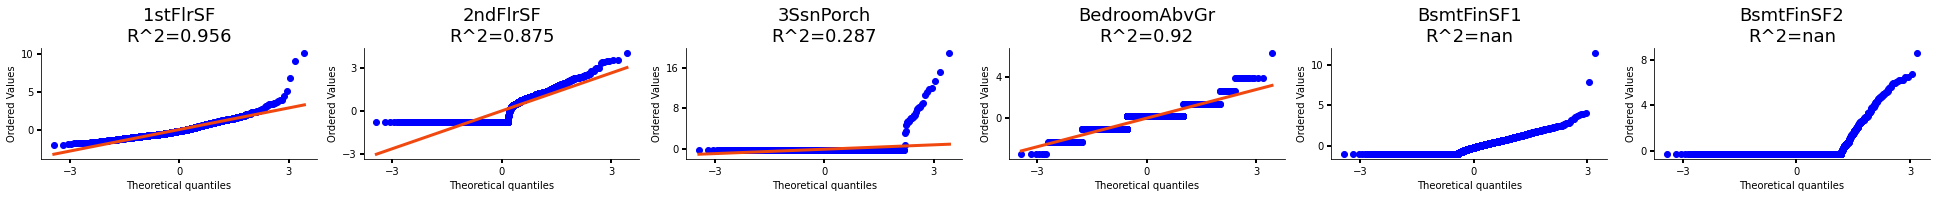

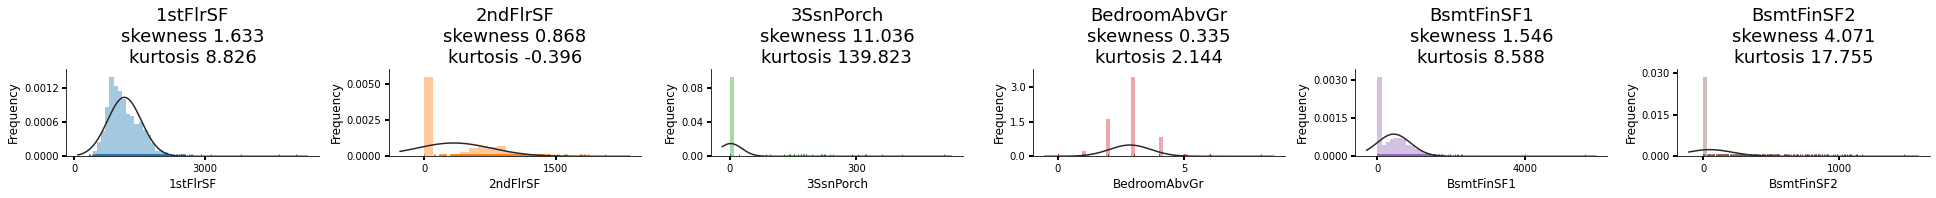

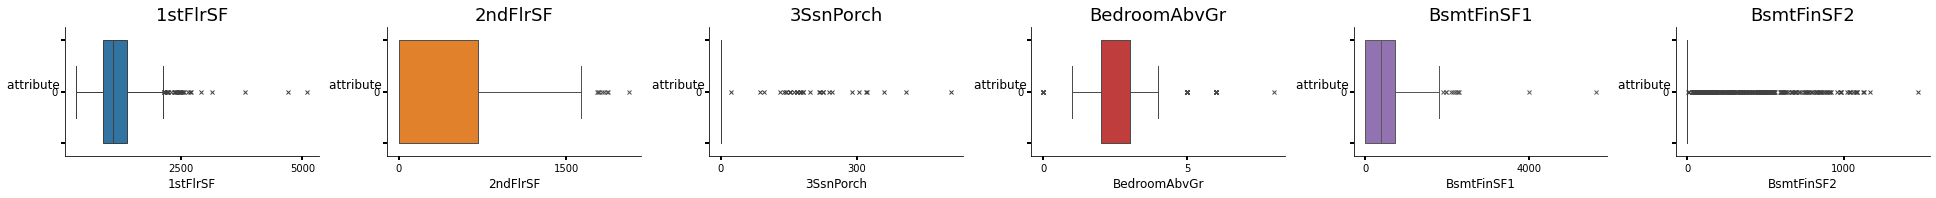

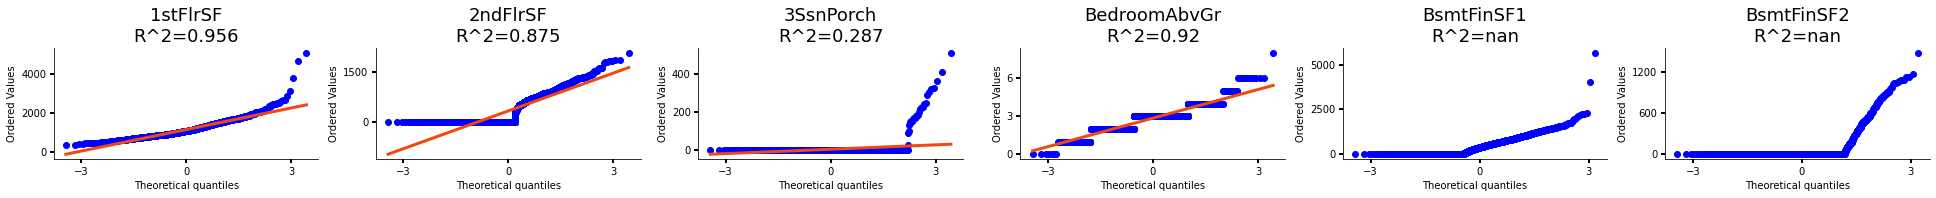

In [18]:
from sklearn.preprocessing import StandardScaler
from src.utils.DataFrameExplorer_distribusion import normality_plots, feature_distribution


warnings.filterwarnings("ignore") # for depracietad function names,



scalled_data = StandardScaler().fit_transform(data_df.loc[:,Quantitative_variables].copy())
scalled_data_df = pd.DataFrame(scalled_data, columns=Quantitative_variables)

for plot_type in ["hist", "box", "probplot"]:   
    normality_plots(
        plot_type=plot_type ,
        df=scalled_data_df, 
        names= Quantitative_variables[0:6],#target_df.columns.values.tolist(),
        figscale=1.5, #color="forestgreen",
        distplot_dct={
            "norm_hist":True, "rug":True, "kde":False , 
            "fit":stats.norm,"hist_kws":{"linewidth":0.5}}
    )
    
    
for plot_type in ["hist", "box", "probplot"]:   
    normality_plots(
        plot_type=plot_type ,
        df=data_df, 
        names= Quantitative_variables[0:6],#target_df.columns.values.tolist(),
        figscale=1.5, #color="forestgreen",
        distplot_dct={
            "norm_hist":True, "rug":True, "kde":False , 
            "fit":stats.norm,"hist_kws":{"linewidth":0.5}}
    )

# generate data

In [19]:
def generate_data(show_flag:bool=True) -> np.ndarray:
    """Generates input data for the function 'check_normality'
    
    Parameters
    show_flag : Controls the display of the generated data
    
    
    Returns
    -------
    data : vector with random data
    """
    
    # Set the parameters
    numData = 1000
    myMean = 0
    mySD = 3
    
    # To get reproducable values, I provide a seed value
    np.random.seed(1234)   
    
    # Generate and show random data
    data = stats.norm.rvs(myMean, mySD, size=numData)
    
    if show_flag:
        plt.hist(data)
        plt.show()
    
    return data